# Question 1

A F&B manager wants to determine whether there is any significant difference in the diameter of the cutlet between two units. A randomly selected sample of cutlets was collected from both units and measured? Analyze the data and draw inferences at 5% significance level. Please state the assumptions and tests that you carried out to check validity of the assumptions.

Minitab File : Cutlets.mtw


In [40]:
# importing libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy

In [2]:
# Reading the file
cut = pd.read_csv('Cutlets.csv')
cut.head()

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


In [3]:
# Create two hypothesis where
# Null hypothesis: Mean (Unit A) = Mean (Unit B)
# Alternate hypothesis: Mean (Unit A) != Mean (Unit B)

# assuming a cut-off value for the two-tailed t test
alpha = 0.025     # alpha is 1/2 for two-tailed t test, 0.05/2 (5% significance level)

# Describe the data
cut.describe()


,Unit A,Unit B
count,35.000000,35.000000
mean,7.019091,6.964297
std,0.288408,0.343401
min,6.437600,6.038000
25%,6.831500,6.753600
50%,6.943800,6.939900
75%,7.280550,7.195000
max,7.516900,7.545900


In [4]:
# Check for duplicates
cut.duplicated().any()

False

In [5]:
# Check for null values
cut.isnull().any()

Unit A    False
Unit B    False
dtype: bool

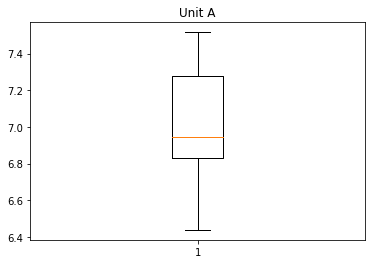

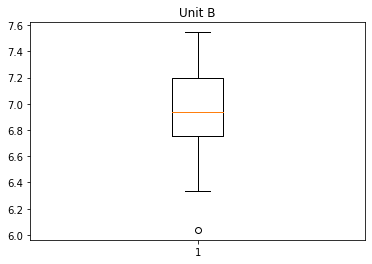

In [6]:
# Plot the data
plt.boxplot(cut['Unit A'])
plt.title('Unit A')
plt.show()
plt.boxplot(cut['Unit B'])
plt.title('Unit B')
plt.show()

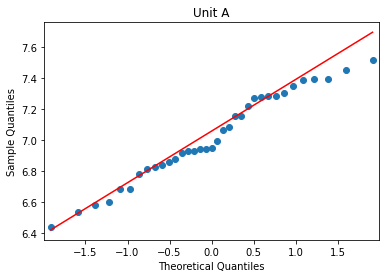

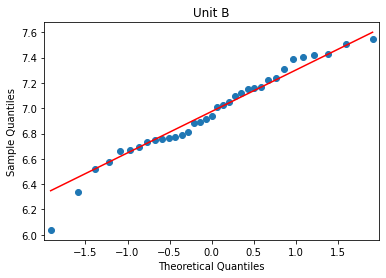

In [7]:
# Plot Q-Q plot to check if datas follow normal distribution
sm.qqplot(cut['Unit A'], line = 'q')
plt.title('Unit A')
plt.show()
sm.qqplot(cut['Unit B'], line = 'q')
plt.title('Unit B')
plt.show()

In [8]:
# Calculate p-value using t-statistics
stat, p_val = stats.ttest_ind(cut['Unit A'], cut['Unit B'], alternative = 'two-sided')
p_val

0.47223947245995

In [9]:
# Compare with alpha to conclude the hypothesis
if p_val >= alpha:
    print('We fail to reject null hypothesis due to lack of evidence. There is no significant difference between Unit A and Unit B.')
else:
    print('We reject the null hypothesis. There is significant difference between Unit A and Unit B.')

We fail to reject null hypothesis due to lack of evidence. There is no significant difference between Unit A and Unit B.


# Question 2

A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected to report dispatch.
   
Analyze the data and determine whether there is any difference in average TAT among the different laboratories at 5% significance level.
 
 
Minitab File: LabTAT.mtw


In [10]:
# Read the file
tat = pd.read_csv('LabTAT.csv')
tat

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60
...,...,...,...,...
115,178.49,170.66,193.80,172.68
116,176.08,183.98,215.25,177.64
117,202.48,174.54,203.99,170.27
118,182.40,197.18,194.52,150.87


In [11]:
tat.describe()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
count,120.000000,120.000000,120.000000,120.00000
mean,178.361583,178.902917,199.913250,163.68275
std,13.173594,14.957114,16.539033,15.08508
min,138.300000,140.550000,159.690000,124.06000
25%,170.335000,168.025000,188.232500,154.05000
50%,178.530000,178.870000,199.805000,164.42500
75%,186.535000,189.112500,211.332500,172.88250
max,216.390000,217.860000,238.700000,205.18000


In [12]:
# check for duplicates
tat.duplicated().any()

False

In [13]:
# check for null values
tat.isnull().any()

Laboratory 1    False
Laboratory 2    False
Laboratory 3    False
Laboratory 4    False
dtype: bool

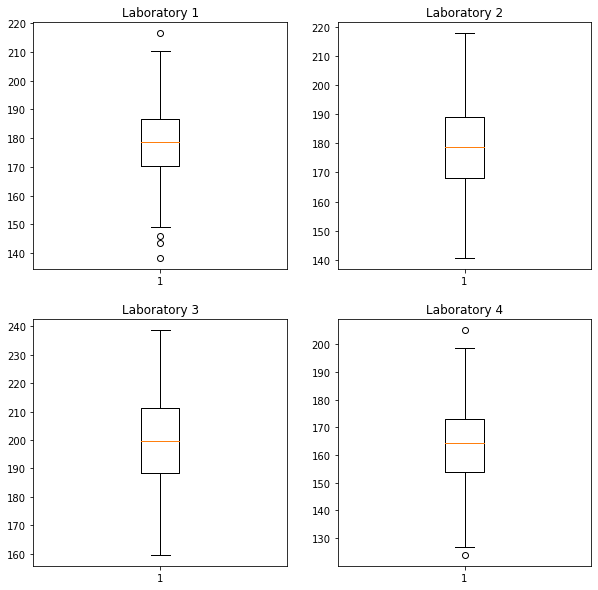

In [14]:
# Plot the datas
fig, ax = plt.subplots(2, 2, figsize = (10,10))
ax[0,0].boxplot(tat['Laboratory 1'])
ax[0,0].set_title('Laboratory 1')
ax[0,1].boxplot(tat['Laboratory 2'])
ax[0,1].set_title('Laboratory 2')
ax[1,0].boxplot(tat['Laboratory 3'])
ax[1,0].set_title('Laboratory 3')
ax[1,1].boxplot(tat['Laboratory 4'])
ax[1,1].set_title('Laboratory 4')
plt.show()

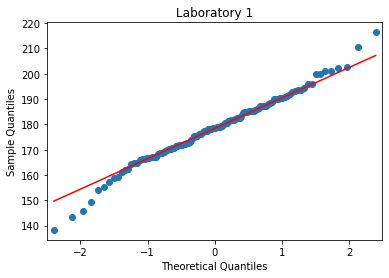

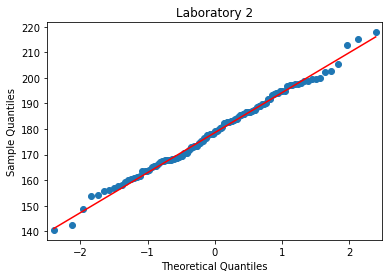

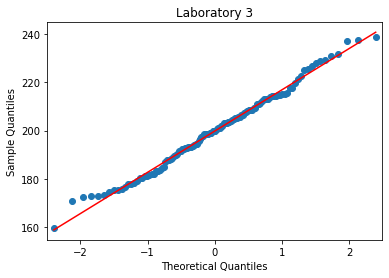

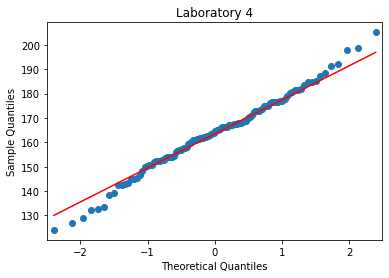

In [15]:
# Plot Q-Q plots to check if the datas follow normal distribution

sm.qqplot(tat['Laboratory 1'], line = 'q')
plt.title('Laboratory 1')
plt.show()
sm.qqplot(tat['Laboratory 2'], line = 'q')
plt.title('Laboratory 2')
plt.show()
sm.qqplot(tat['Laboratory 3'], line = 'q')
plt.title('Laboratory 3')
plt.show()
sm.qqplot(tat['Laboratory 4'], line = 'q')
plt.title('Laboratory 4')
plt.show()

In [16]:
# For 4 independent samples we will conduct ANOVA test
# Setting up hypothesis
# Null hypothesis: Mean 1 = Mean 2 = Mean 3 = Mean 4
# Alternate hypothesis: Aleast one of the mean is different

alpha = 0.05     # At 5% significance level

# Calculating p-value with t-statistics
stat, p_val = stats.f_oneway(tat.iloc[:,0], tat.iloc[:,1], tat.iloc[:,2], tat.iloc[:,3])
p_val

2.1156708949992414e-57

In [17]:
# Compare p-value with alpha
if p_val <= alpha:
    print('We reject Null Hypothesis there is a significance difference between TAT of reports of the laboratories')
else:
    print('We fail to reject Null hypothesis')

We reject Null Hypothesis there is a significance difference between TAT of reports of the laboratories


# Question 3

Sales of products in four different regions is tabulated for males and females. Find if male-female buyer rations are similar across regions.

1. Check p-value
2. If p-Value < alpha, we reject Null Hypothesis
Buyer Ratio.mtw


In [18]:
# Reading the file
buy = pd.read_csv('BuyerRatio.csv')
buy

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


In [ ]:
# According to the question
# H_0 = All proportions are equal     # null hypotthesis
# H_a = Not all proportions are equal # alternate hypothesis

# For one-tailed test 
alpha = 0.05   # at 5% significance level

# We will perform chi-square test for independence with contingency table
from scipy.stats import ch2_contingency
stat, p, df, exp = stats.ch2_contingency(buy)

In [20]:
obs = np.array([50, 142, 131, 70, 435, 1523, 1356, 750])
expected = np.array([42.76531299, 146.81287862, 131.11756787, 72.30424052, 442.23468701, 1518.18712138, 1355.88243213, 747.69575948])

In [22]:
# Comparing evidence with hypothesis
statistics, p_val = stats.chisquare(obs, expected, ddof = 3)
print("Statistics = ",statistics,"\n",'P_Value = ', p_val)

Statistics =  1.5959455390914483 
 P_Value =  0.8095206646905712


In [24]:
# Comparing alpha and p-value

print('Significnace=%.3f, p=%.3f' % (alpha, p_val))
if p_val <= alpha:
    print('We reject Null Hypothesis there is a significance difference between TAT of reports of the laboratories')
else:
    print('We fail to reject Null hypothesis')

Significnace=0.050, p=0.810
We fail to reject Null hypothesis


## Question 4

TeleCall uses 4 centers around the globe to process customer order forms. They audit a certain %  of the customer order forms. Any error in order form renders it defective and has to be reworked before processing.  The manager wants to check whether the defective %  varies by centre. Please analyze the data at 5% significance level and help the manager draw appropriate inferences


In [41]:
# Reading the file
cus = pd.read_csv('CustomerOrderForm.csv')
cus

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free
...,...,...,...,...
295,Error Free,Error Free,Error Free,Error Free
296,Error Free,Error Free,Error Free,Error Free
297,Error Free,Error Free,Defective,Error Free
298,Error Free,Error Free,Error Free,Error Free


In [44]:
# Printing value counts
print(cus['Phillippines'].value_counts(), cus['Indonesia'].value_counts(), cus['Malta'].value_counts(), cus['India'].value_counts)

Error Free    271
Defective      29
Name: Phillippines, dtype: int64 Error Free    267
Defective      33
Name: Indonesia, dtype: int64 Error Free    269
Defective      31
Name: Malta, dtype: int64 <bound method IndexOpsMixin.value_counts of 0      Error Free
1       Defective
2      Error Free
3      Error Free
4      Error Free
          ...    
295    Error Free
296    Error Free
297    Error Free
298    Error Free
299    Error Free
Name: India, Length: 300, dtype: object>


In [ ]:
observed=([[271,267,269,280],[29,33,31,20]])

In [ ]:
stat, p, dof, expected = chi2_contingency([[271,267,269,280],[29,33,31,20]])

In [ ]:
from scipy.stats import ch2

# Performing ch2 test
alpha = 0.05
prob=1-alpha
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0),variables are related')
else:
    print('Independent (fail to reject H0), variables are not related')

In [ ]:
# Comparing alpha and P-value
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')